<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
medical_df = pd.read_csv('drive/MyDrive/Colab Notebooks/ML_Hanna_Pylieva/data/medical-charges_1.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Коефіцієнти моделі (theta): [-2091.42055657   267.24891283]
Прогнози для перших трьох значень: [2719.0598744  5391.54900271 6727.79356686]
Реальні значення для перших трьох значень: [ 1725.5523   4449.462   21984.47061]


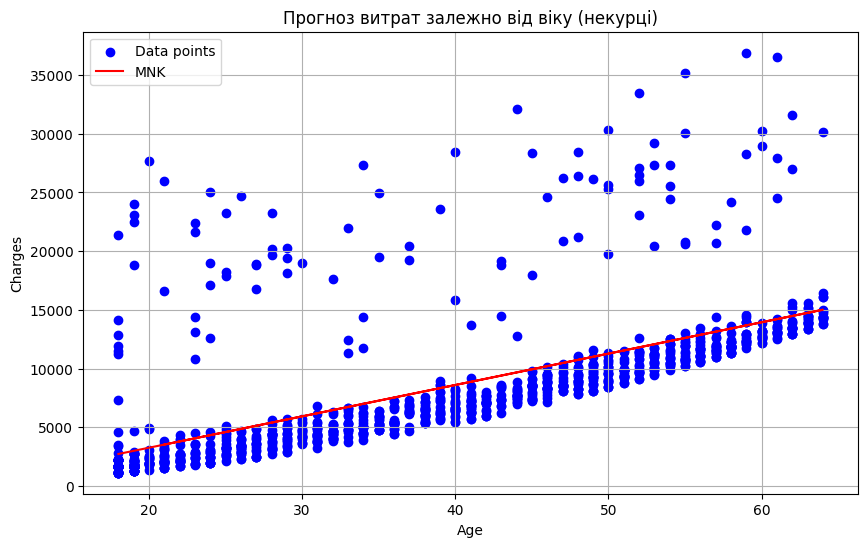

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Виділення X і y
X = np.array(non_smoker_df["age"])  # Незалежна змінна (вік)
y = np.array(non_smoker_df["charges"]) # Залежна змінна (витрати)

# Додаємо колонку одиниць для врахування вільного члена (константи) в моделі
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

# Функція для обчислення коефіцієнтів за допомогою методу МНК
def normal_equations(X, y):
    """Розрахунок коефіцієнтів за методом МНК."""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Обчислення коефіцієнтів
MNK_coefs = normal_equations(X_with_intercept, y)

# Прогнозування
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

# Результати
print("Коефіцієнти моделі (theta):", MNK_coefs)
print("Прогнози для перших трьох значень:", predictions_MNK[:3])
print("Реальні значення для перших трьох значень:", y[:3])

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title("Прогноз витрат залежно від віку (некурці)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, predictions_MNK)
# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y, predictions_MNK) # Remove squared argument
rmse = np.sqrt(mse)  # Calculate RMSE manually
mae = mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R² score: 0.39
MSE: 21738960.02
RMSE: 4662.51
MAE: 2580.52


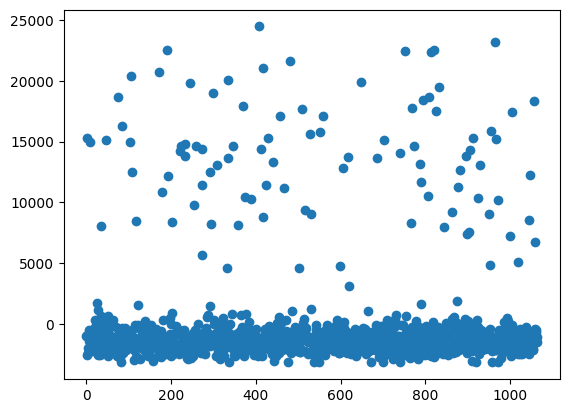

In [ ]:
errors = y - predictions_MNK
plt.plot(errors, 'o');

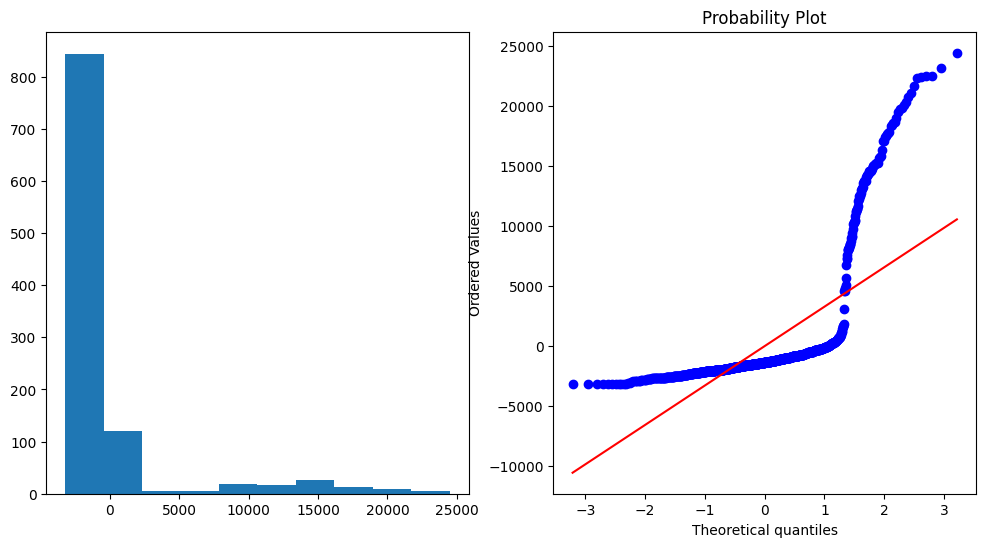

In [ ]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

In [ ]:
X = np.array(non_smoker_df["age"]).reshape(-1, 1)  # Незалежна змінна (вік)
y = np.array(non_smoker_df["charges"]) # Залежна змінна (витрати)

In [ ]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.001, epochs=500)
predictions_fbgd = m * X[:, 0] + b

print(f"Для learning rate = {lr}: m = {m}, b = {b}")
print("Прогнози для перших трьох значень:", predictions_fbgd[:3])
print("Реальні значення для перших трьох значень:", y[:3])

Для learning rate = 0.001: m = -2.267485986146637e+201, b = -5.105377783839002e+199
Прогнози для перших трьох значень: [-4.08658015e+202 -6.35406614e+202 -7.48780913e+202]
Реальні значення для перших трьох значень: [ 1725.5523   4449.462   21984.47061]


<ipython-input-173-6f438c8d852d>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-173-6f438c8d852d>:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))


In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0005, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

print(f"Для learning rate lr=0.0005: m = {m}, b = {b}")
print("Прогнози для перших трьох значень:", predictions_fbgd[:3])
print("Реальні значення для перших трьох значень:", y[:3])

Для learning rate lr=0.0005: m = 225.1005806901033, b = -219.45815699658448
Прогнози для перших трьох значень: [3832.35229543 6083.35810233 7208.86100578]
Реальні значення для перших трьох значень: [ 1725.5523   4449.462   21984.47061]


In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

print(f"Для learning rate lr=0.0001: m = {m}, b = {b}")
print("Прогнози для перших трьох значень:", predictions_fbgd[:3])
print("Реальні значення для перших трьох значень:", y[:3])

Для learning rate lr=0.0001: m = 221.1045843794301, b = -41.98126853149978
Прогнози для перших трьох значень: [3937.9012503  6148.94709409 7254.47001599]
Реальні значення для перших трьох значень: [ 1725.5523   4449.462   21984.47061]


In [ ]:
np.mean(y), np.std(y), np.min(y)

(8434.268297856204, 5990.9645302876115, 1121.8739)

In [ ]:
np.mean(predictions_fbgd), np.std(predictions_fbgd), np.min(predictions_fbgd)

(8666.297597074139, 3112.4428725043435, 3937.901250298242)

In [ ]:
mae = mean_absolute_error(y, predictions_fbgd)
mse = mean_squared_error(y, predictions_fbgd)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions_fbgd)

print(f"R² score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 0.38
MAE: 2803.85
MSE: 22214731.06
RMSE: 4713.25


<ipython-input-173-6f438c8d852d>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-173-6f438c8d852d>:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))


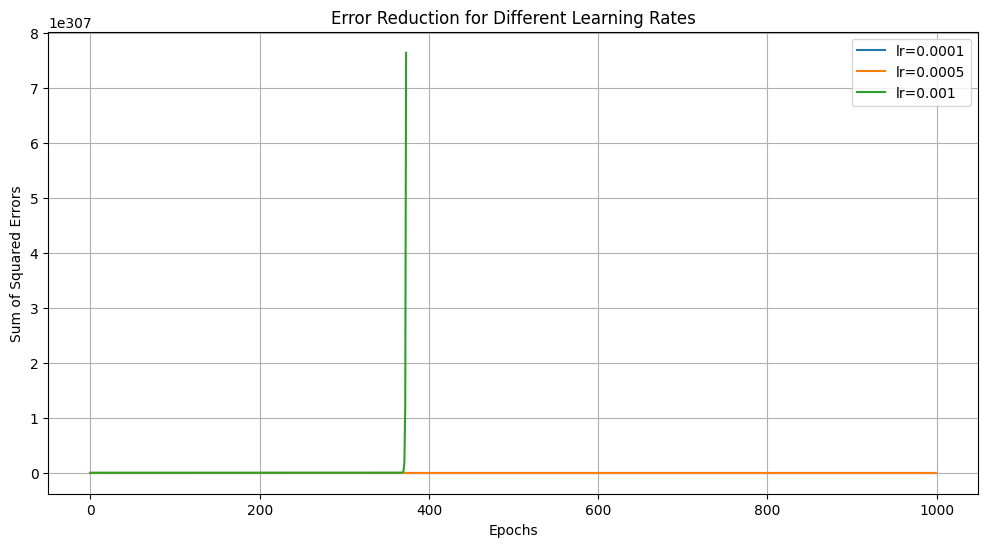

In [ ]:
learning_rates_to_test = {
    0.0001: 1000,
    0.0005: 1000,
    0.001: 500
}

error_results = {}

for lr, epochs in learning_rates_to_test.items():
    _, _, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=epochs)
    error_results[lr] = errors

plt.figure(figsize=(12, 6))
for lr, errors in error_results.items():
    plt.plot(errors, label=f"lr={lr}")

plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Errors")
plt.title("Error Reduction for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

predictions_sklearn = lin_reg.predict(X)

print("Коефіцієнти моделі:", lin_reg.intercept_, lin_reg.coef_)
print("Прогнози для перших трьох значень:", predictions_sklearn[:3])
print("Реальні значення для перших трьох значень:", y[:3])


Коефіцієнти моделі: -2091.4205565650864 [267.24891283]
Прогнози для перших трьох значень: [2719.0598744  5391.54900271 6727.79356686]
Реальні значення для перших трьох значень: [ 1725.5523   4449.462   21984.47061]


In [ ]:
r2 = r2_score(y, predictions_sklearn)
mse = mean_squared_error(y, predictions_sklearn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions_sklearn)

print(f"R² score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 0.39
MAE: 2580.52
MSE: 21738960.02
RMSE: 4662.51


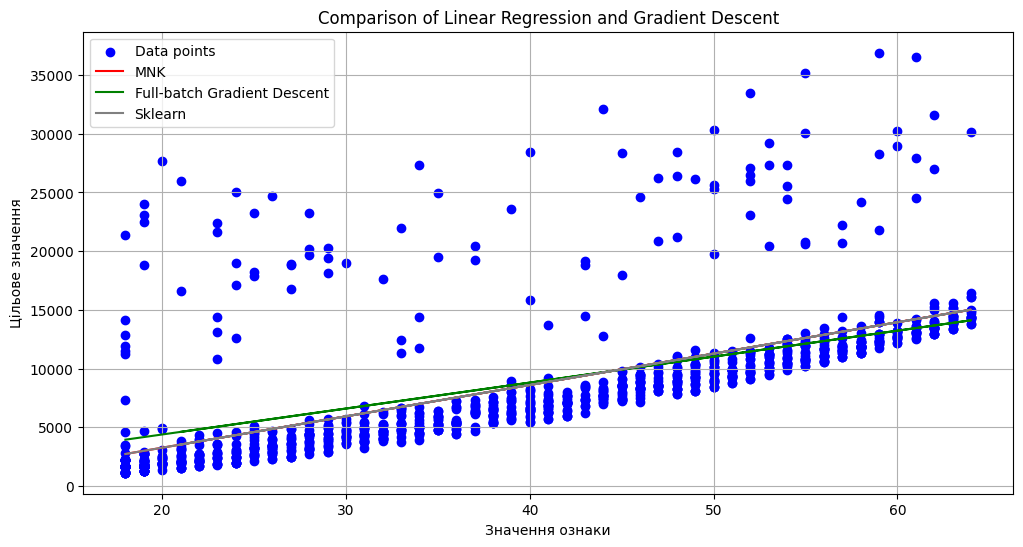

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

## Висновки:

Усі три методи (МНК, градієнтний спуск і sklearn) показують схожі результати, що свідчить про правильне застосування алгоритмів.

МНК та sklearn дають точнішу та стабільнішу лінію.

Градієнтний спуск залежить від вибору learning rate та кількості ітерацій. Якщо ці параметри налаштовані неправильно, градієнтний спуск може дати неточний результат або не збігтися.

для МНК та sklearn збігаються наступні дані:

R² score: 0.39

MSE: 21738960.02

RMSE: 4662.51

MAE: 2580.52

для градієнтного спуску є дещо інші результати:

R² score: 0.38

MAE: 2803.85

MSE: 22214731.06

RMSE: 4713.25

R² Score свідчить про те, що модель пояснює лише 39% варіації в цільовій змінній, що є досить низьким результатом. Це вказує на необхідність додавання додаткових ознак до моделі.

RMSE 4662.51 є досить високим у порівнянні з середнім значеннями витрат.

Модель недостатньо добре пояснює залежність між віком та витратами на медичне обслуговування.
Можливо, це пов'язано з великим розкидом даних у `charges`, ці дані потребують нормалізації.
Існує значна помилка в прогнозах, що вказує на те, що потрібно додати більше ознак.



 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [182]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [190]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker

X = np.array(smoker_df["age"]).reshape(-1, 1)  # Незалежна змінна (вік)
y = np.array(smoker_df["charges"]) # Залежна змінна (витрати)

lin_reg_smoker.fit(X, y)
lin_reg_smoker.intercept_, lin_reg_smoker.coef_

predictions_sklearn_smoker = lin_reg_smoker.predict(X)

print("Коефіцієнти моделі:", lin_reg_smoker.intercept_, lin_reg_smoker.coef_)
print("Прогнози для перших трьох значень:", predictions_sklearn_smoker[:3])
print("Реальні значення для перших трьох значень:", y[:3])

Коефіцієнти моделі: 20294.128126915966 [305.23760211]
Прогнози для перших трьох значень: [26093.642567   39218.85945773 28535.54338388]
Реальні значення для перших трьох значень: [16884.924  27808.7251 39611.7577]


In [185]:
np.mean(y), np.std(y), np.min(y)

(32050.23183153284, 11520.46670652943, 12829.4551)

In [187]:
np.mean(predictions_sklearn_smoker), np.std(predictions_sklearn_smoker), np.min(predictions_sklearn_smoker)

(32050.23183153284, 4242.117444530743, 25788.404964892885)

In [188]:
r2 = r2_score(y, predictions_sklearn_smoker)
mse = mean_squared_error(y, predictions_sklearn_smoker)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions_sklearn_smoker)

print(f"R² score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 0.14
MAE: 10097.80
MSE: 114725592.72
RMSE: 10711.00


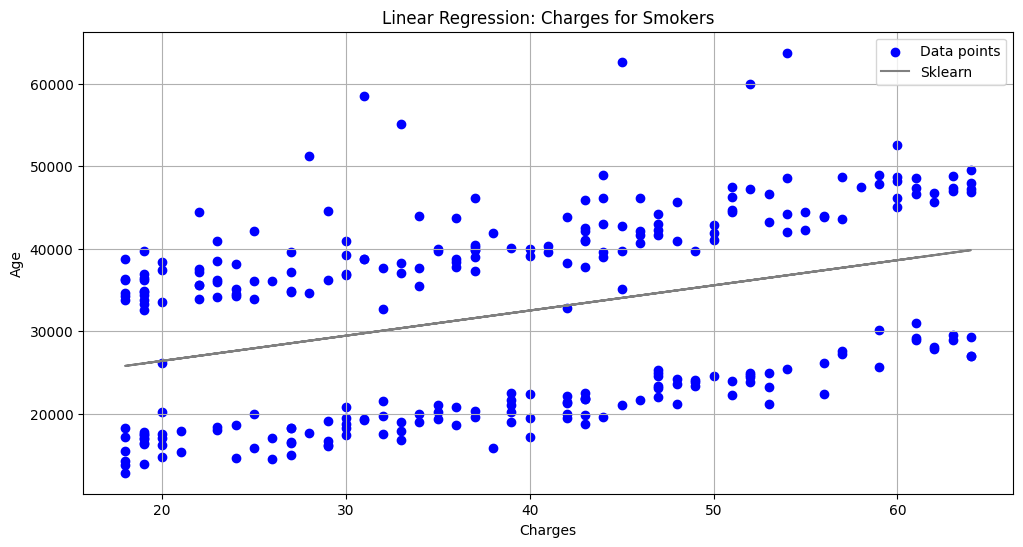

In [189]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn_smoker, color='grey', label='Sklearn')
plt.title('Linear Regression: Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Висновки

На графіку видно, що модель намагається спрогнозувати залежність між віком та витратами для курців, але трендова лінія проходить дуже далеко від багатьох точок.

Низький R² Score (0.14) вказує на те, що модель пояснює лише 14% варіації у витратах, що є дуже слабким результатом.

Високі значення MAE (10,097.80) та RMSE (10,711.00) показують, що модель у середньому помиляється на значні суми при прогнозуванні витрат для курців.

Чи можна використовувати цю модель у компанії?

Ні, модель не є достатньо точною.